In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import random

random.seed(18024689)

In [ ]:
df = pd.read_csv("/content/train 2.csv")

In [ ]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
df.isnull().sum().sum()

310

#Q1) Is the cleanliness satisfaction gendered? Does female and male passengers find cleanliness in the flight different?

In [ ]:
df1 = df[['Gender','Cleanliness']]

In [ ]:
df1

,Gender,Cleanliness
0,Male,5
1,Male,1
2,Female,5
3,Female,2
4,Male,3
...,...,...
103899,Female,2
103900,Male,4
103901,Male,4
103902,Female,1


In [ ]:
#No Nans in the DF
df1.isnull().sum().sum()

0

In [ ]:
dfm = df1.loc[df["Gender"] == 'Male']
dff = df1.loc[df["Gender"] == 'Female']

In [ ]:
f = dff["Cleanliness"].to_numpy()
m = dfm["Cleanliness"].to_numpy()

#Using U-test

In [ ]:
from scipy import stats
u1,p1 = stats.mannwhitneyu(m, f)
print(p1)

0.02320296780609539


In [ ]:
#Null hypothesis-> Male and female find cleaniless same,
#p-value 0.02 <0.05 so we reject the null hypothesis, so we say that Male and female 
#find cleanliness of the flight different

In [ ]:
print(f)

[5 2 1 ... 4 2 1]


#Is Seat comfort based on age, i.e based younger and older passengers 

In [ ]:
df3 = df[['Age','Seat comfort']]
med_age = df3['Age'].median()
print(med_age)

df_young = df3[df3["Age"] <= med_age]
df_old = df3[df3["Age"] > med_age]


40.0


In [ ]:
import seaborn as sns
sns.set_style('darkgrid') 
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

(array([12049.,  9073., 10010.,  7349.,  5236.,  3560.,  2005.,   405.,
          240.,    17.]),
 array([41. , 45.4, 49.8, 54.2, 58.6, 63. , 67.4, 71.8, 76.2, 80.6, 85. ]),
 <a list of 10 Patch objects>)

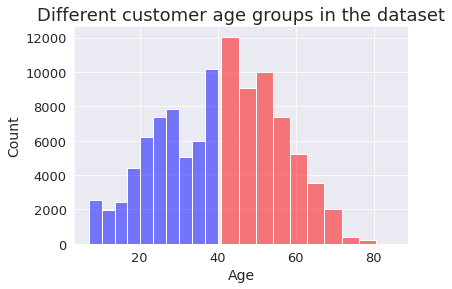

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Different customer age groups in the dataset')
plt.hist(df_young['Age'],fc=(0, 0, 1, 0.5))
plt.hist(df_old['Age'],fc=(1, 0, 0, 0.5))

In [ ]:
df_young.isnull().sum().sum()

0

In [ ]:
y = df_young["Seat comfort"].to_numpy()
o = df_old["Seat comfort"].to_numpy()

In [ ]:
print(y)

[5 1 5 ... 5 1 1]


In [ ]:
from scipy import stats
u1,p1 = stats.mannwhitneyu(y, o)
print(p1)

0.0


In [ ]:
type(y)

numpy.ndarray

#Age vs customer type(loyal or disloyal)

In [ ]:
df4 = df[['Age','Customer Type']] 

In [ ]:
df4

,Age,Customer Type
0,13,Loyal Customer
1,25,disloyal Customer
2,26,Loyal Customer
3,25,Loyal Customer
4,61,Loyal Customer
...,...,...
103899,23,disloyal Customer
103900,49,Loyal Customer
103901,30,disloyal Customer
103902,22,disloyal Customer


In [ ]:
df_loyal = df4[df4["Customer Type"] == 'Loyal Customer']
df_disloyal = df4[df4["Customer Type"] == 'disloyal Customer']

In [ ]:

l = list(df_loyal["Age"].to_numpy())
d = list(df_disloyal["Age"].to_numpy())

print(type(l))

from scipy import stats
t1,p1 = stats.ttest_ind(l,d)
print(p1)

<class 'list'>
0.0


#Flight Distance vs food satisfaction

In [ ]:
df5 = df[['Flight Distance','Food and drink']]
mean_distance = df5['Flight Distance'].mean()
df_shortf = df5[df5["Flight Distance"] < mean_distance]
df_longf = df5[df5["Flight Distance"] > mean_distance]
print(mean_distance)

1189.4483754234677


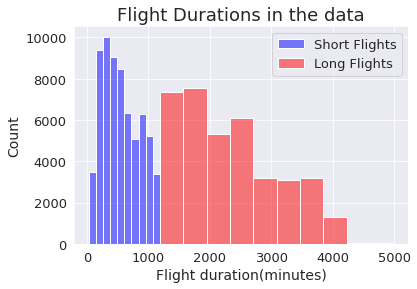

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('Flight duration(minutes)')
plt.ylabel('Count')
plt.title('Flight Durations in the data')

plt.hist(df_shortf['Flight Distance'],fc=(0, 0, 1, 0.5))
plt.hist(df_longf['Flight Distance'],fc=(1, 0, 0, 0.5))
plt.legend(['Short Flights','Long Flights'])

In [ ]:
from scipy import stats
ks,p1 = stats.ks_2samp(df_shortf['Food and drink'].tolist(),df_longf['Food and drink'].tolist())
print(p1)

u1,p1 = stats.mannwhitneyu(df_shortf['Food and drink'].tolist(),df_longf['Food and drink'].tolist())
print(p1)

2.590992504354077e-53
5.4503158211913046e-61
